In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import SimpleITK as sitk
from pathlib import Path

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [3]:
download_base = Path('abc_atlas')
abc_cache = AbcProjectCache.from_cache_dir(download_base)

abc_cache.current_manifest

'releases/20250131/manifest.json'

In [4]:
abc_cache.list_data_files('Allen-CCF-2020')

['annotation_10', 'annotation_boundary_10', 'average_template_10']

In [5]:
file = abc_cache.get_data_path(directory='Allen-CCF-2020', file_name='average_template_10')
average_template_image = sitk.ReadImage(file)
average_template_array = sitk.GetArrayViewFromImage(average_template_image)

file = abc_cache.get_data_path(directory='Allen-CCF-2020', file_name='annotation_10')
annotation_image = sitk.ReadImage(file)
annotation_array = sitk.GetArrayViewFromImage(annotation_image)

file = abc_cache.get_data_path(directory='Allen-CCF-2020', file_name='annotation_boundary_10')
annotation_boundary_image = sitk.ReadImage(file)
annotation_boundary_array = sitk.GetArrayViewFromImage(annotation_boundary_image)

In [6]:
# Function to print out image information
def image_info(img):
    print(f'size: {img.GetSize()} voxels')
    print(f'spacing: {img.GetSpacing()} mm')
    print(f'direction: {img.GetDirection()}')
    print(f'origin: {img.GetOrigin()}')

In [7]:
image_info(average_template_image)

size: (1320, 800, 1140) voxels
spacing: (0.009999999776482582, 0.009999999776482582, 0.009999999776482582) mm
direction: (-0.0, 0.0, -1.0, 1.0, -0.0, 0.0, 0.0, -1.0, 0.0)
origin: (5.695000171661377, -5.349999904632568, 5.21999979019165)


In [8]:
spacing = average_template_image.GetSpacing()
voxel_volume = spacing[0] * spacing[1] * spacing[2]
print("voxel volume in mm^3:", "%0.2E" % voxel_volume)

voxel volume in mm^3: 1.00E-06


In [9]:
def plot_section(slice, cmap = plt.cm.Greys_r, fig_width = 6, fig_height = 6):
    fig, ax = plt.subplots()
    fig.set_size_inches(fig_width, fig_height)
    if cmap is not None:
        plt.imshow(slice, cmap=cmap)
    else :
        plt.imshow(slice)
    plt.axis("off")
    return fig, ax

In [10]:
parcellation = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020', file_name='parcellation')
parcellation.set_index('parcellation_index', inplace=True)
print("number of parcellations:", len(parcellation))
parcellation

number of parcellations: 688


,label,voxel_count,volume_mm3
parcellation_index,,,
987,AllenCCF-Annotation-2020-997,3564320,3.564320
63,AllenCCF-Annotation-2020-68,256520,0.256520
657,AllenCCF-Annotation-2020-667,232608,0.232608
1288,AllenCCF-Annotation-2020-526157192,371584,0.371584
1289,AllenCCF-Annotation-2020-526157196,112222,0.112222
...,...,...,...
135,AllenCCF-Annotation-2020-140,405256,0.405256
140,AllenCCF-Annotation-2020-145,499566,0.499566
148,AllenCCF-Annotation-2020-153,461680,0.461680


In [11]:
parcellation_term_set = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020', file_name='parcellation_term_set')
parcellation_term_set.set_index('label', inplace=True)
print("number of term sets:", len(parcellation_term_set))
parcellation_term_set

number of term sets: 5


,description,name,parcellation_terminology_label,term_set_order,parent_term_set_label
label,,,,,
AllenCCF-Ontology-2017-ORGA,organ,organ,AllenCCF-Ontology-2017,0,NaN
AllenCCF-Ontology-2017-CATE,mouse brain anatomical catergories,category,AllenCCF-Ontology-2017,1,AllenCCF-Ontology-2017-ORGA
AllenCCF-Ontology-2017-DIVI,mouse brain divisions,division,AllenCCF-Ontology-2017,2,AllenCCF-Ontology-2017-CATE
AllenCCF-Ontology-2017-STRU,mouse brain structures,structure,AllenCCF-Ontology-2017,3,AllenCCF-Ontology-2017-DIVI
AllenCCF-Ontology-2017-SUBS,mouse brain substructures,substructure,AllenCCF-Ontology-2017,4,AllenCCF-Ontology-2017-STRU


In [12]:
parcellation_term = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020', file_name='parcellation_term')
parcellation_term.set_index('label', inplace=True)
print("number of terms:", len(parcellation_term))
parcellation_term.head(5)

number of terms: 1631


,acronym,name,color_hex_triplet,graph_order,identifier,red,green,blue,parent_identifier
label,,,,,,,,,
AllenCCF-Ontology-2017-997,brain,brain,#FFFFFF,0.0,MBA:997,255,255,255,NaN
AllenCCF-Ontology-2017-8,grey,Basic cell groups and regions,#BFDAE3,1.0,MBA:8,191,218,227,MBA:997
AllenCCF-Ontology-2017-567,CH,Cerebrum,#B0F0FF,2.0,MBA:567,176,240,255,MBA:8
AllenCCF-Ontology-2017-688,CTX,Cerebral cortex,#B0FFB8,3.0,MBA:688,176,255,184,MBA:567
AllenCCF-Ontology-2017-695,CTXpl,Cortical plate,#70FF70,4.0,MBA:695,112,255,112,MBA:688


In [13]:
parcellation_term_set_membership = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                                    file_name='parcellation_term_set_membership')
print("number of memberships:", len(parcellation_term_set_membership))
parcellation_term_set_membership.head(5)

number of memberships: 1293


,parcellation_term_label,parcellation_term_set_label,parent_term_label,term_order
0,AllenCCF-Ontology-2017-997,AllenCCF-Ontology-2017-ORGA,NaN,0
1,AllenCCF-Ontology-2017-8,AllenCCF-Ontology-2017-CATE,AllenCCF-Ontology-2017-997,1
2,AllenCCF-Ontology-2017-1009,AllenCCF-Ontology-2017-CATE,AllenCCF-Ontology-2017-997,2
3,AllenCCF-Ontology-2017-73,AllenCCF-Ontology-2017-CATE,AllenCCF-Ontology-2017-997,3
4,AllenCCF-Ontology-2017-315,AllenCCF-Ontology-2017-DIVI,AllenCCF-Ontology-2017-8,1


In [14]:
parcellation_annotation = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                           file_name='parcellation_to_parcellation_term_membership')
print("number of memberships:", len(parcellation_annotation))
parcellation_annotation

number of memberships: 3440


,parcellation_label,parcellation_term_label,parcellation_term_set_label,parcellation_index,voxel_count,volume_mm3,color_hex_triplet,red,green,blue,parcellation_term_name,parcellation_term_acronym,parcellation_term_set_name,term_set_order,term_order,parent_term_label
0,AllenCCF-Annotation-2020-997,AllenCCF-Ontology-2017-997,AllenCCF-Ontology-2017-ORGA,987,3564320,3.564320,#FFFFFF,255,255,255,brain,brain,organ,0,0,NaN
1,AllenCCF-Annotation-2020-68,AllenCCF-Ontology-2017-997,AllenCCF-Ontology-2017-ORGA,63,256520,0.256520,#FFFFFF,255,255,255,brain,brain,organ,0,0,NaN
2,AllenCCF-Annotation-2020-68,AllenCCF-Ontology-2017-8,AllenCCF-Ontology-2017-CATE,63,256520,0.256520,#BFDAE3,191,218,227,Basic cell groups and regions,grey,category,1,1,AllenCCF-Ontology-2017-997
3,AllenCCF-Annotation-2020-68,AllenCCF-Ontology-2017-315,AllenCCF-Ontology-2017-DIVI,63,256520,0.256520,#70FF71,112,255,113,Isocortex,Isocortex,division,2,1,AllenCCF-Ontology-2017-8
4,AllenCCF-Annotation-2020-68,AllenCCF-Ontology-2017-184,AllenCCF-Ontology-2017-STRU,63,256520,0.256520,#268F45,38,143,69,"Frontal pole, cerebral cortex",FRP,structure,3,1,AllenCCF-Ontology-2017-315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435,AllenCCF-Annotation-2020-145,ABC-Ontology-2023-V4-structure,AllenCCF-Ontology-2017-STRU,140,499566,0.499566,#AAAAAA,170,170,170,"fourth ventricle, unassigned",V4-unassigned,structure,3,367,AllenCCF-Ontology-2017-145
3436,AllenCCF-Annotation-2020-145,ABC-Ontology-2023-V4-substructure,AllenCCF-Ontology-2017-SUBS,140,499566,0.499566,#AAAAAA,170,170,170,"fourth ventricle, unassigned",V4-unassigned,substructure,4,885,ABC-Ontology-2023-V4-structure
3437,AllenCCF-Annotation-2020-153,ABC-Ontology-2023-V4r-substructure,AllenCCF-Ontology-2017-SUBS,148,461680,0.461680,#AAAAAA,170,170,170,lateral recess,V4r,substructure,4,886,AllenCCF-Ontology-2017-153
3438,AllenCCF-Annotation-2020-164,ABC-Ontology-2023-c-structure,AllenCCF-Ontology-2017-STRU,159,432,0.000432,#AAAAAA,170,170,170,"central canal, spinal cord/medulla",c,structure,3,369,AllenCCF-Ontology-2017-164


In [15]:
# Count the number of parcellation associated with each parcellation term
term_parcellation_count = parcellation_annotation.groupby(['parcellation_term_label'])[['parcellation_index']].count()
term_parcellation_count.columns = ['number_of_parcellations']
term_parcellation_count.sort_values('number_of_parcellations', inplace=True, ascending=False)
term_parcellation_count

,number_of_parcellations
parcellation_term_label,
AllenCCF-Ontology-2017-997,687
AllenCCF-Ontology-2017-8,597
AllenCCF-Ontology-2017-315,241
AllenCCF-Ontology-2017-1009,81
AllenCCF-Ontology-2017-313,59
...,...
AllenCCF-Ontology-2017-1069,1
AllenCCF-Ontology-2017-10671,1
AllenCCF-Ontology-2017-1066,1


In [16]:
# Count the number of voxels associated with each parcellation term
term_voxel_count = parcellation_annotation.groupby(['parcellation_term_label'])[['voxel_count','volume_mm3']].sum()
term_voxel_count.sort_values('voxel_count', inplace=True, ascending=False)
term_voxel_count

,voxel_count,volume_mm3
parcellation_term_label,,
ABC-Ontology-2023-unassigned-substructure,697783214,697.783214
ABC-Ontology-2023-unassigned-organ,697783214,697.783214
ABC-Ontology-2023-unassigned-structure,697783214,697.783214
ABC-Ontology-2023-unassigned-division,697783214,697.783214
ABC-Ontology-2023-unassigned-category,697783214,697.783214
...,...,...
ABC-Ontology-2023-c-substructure,432,0.000432
ABC-Ontology-2023-CA1-substructure,6,0.000006
AllenCCF-Ontology-2017-1051,4,0.000004


In [17]:
# Join counts with the term dataframe
term_with_counts = parcellation_term.join(term_parcellation_count['number_of_parcellations'], how='inner')
term_with_counts.index.name = 'label'
term_with_counts = term_with_counts.join(term_voxel_count[['voxel_count','volume_mm3']])
term_with_counts[['name', 'number_of_parcellations', 'voxel_count', 'volume_mm3']]
term_with_counts.head(5)

,acronym,name,color_hex_triplet,graph_order,identifier,red,green,blue,parent_identifier,number_of_parcellations,voxel_count,volume_mm3
label,,,,,,,,,,,,
AllenCCF-Ontology-2017-997,brain,brain,#FFFFFF,0.0,MBA:997,255,255,255,NaN,687,506056786,506.056786
AllenCCF-Ontology-2017-8,grey,Basic cell groups and regions,#BFDAE3,1.0,MBA:8,191,218,227,MBA:997,597,449681182,449.681182
AllenCCF-Ontology-2017-315,Isocortex,Isocortex,#70FF71,5.0,MBA:315,112,255,113,MBA:695,241,123282624,123.282624
AllenCCF-Ontology-2017-184,FRP,"Frontal pole, cerebral cortex",#268F45,6.0,MBA:184,38,143,69,MBA:315,5,973876,0.973876
AllenCCF-Ontology-2017-68,FRP1,"Frontal pole, layer 1",#268F45,7.0,MBA:68,38,143,69,MBA:184,1,256520,0.256520


In [18]:
# validate that term with the same acronym have the same number of voxels
alist = np.unique(term_with_counts['acronym'])
for aa in alist :
    filtered = term_with_counts[term_with_counts['acronym'] == aa]
    vlist = np.unique(filtered['voxel_count'])
    if len(vlist) > 1:
        print(aa, vlist)

In [19]:
pivot = parcellation_annotation.groupby(['parcellation_index','parcellation_term_set_name'])['parcellation_term_acronym'].first().unstack()
pivot = pivot[parcellation_term_set['name']] # order columns
pivot

parcellation_term_set_name,organ,category,division,structure,substructure
parcellation_index,,,,,
0,unassigned,unassigned,unassigned,unassigned,unassigned
1,brain,grey,HY,TMv,TMv
2,brain,grey,Isocortex,SSp-m,SSp-m6b
5,brain,fiber tracts,lfbs,cst,int
6,brain,grey,P,PSV,PSV
...,...,...,...,...,...
1323,brain,grey,MB,IPN,IPI
1324,brain,grey,MB,IPN,IPDM
1325,brain,grey,MB,IPN,IPDL


In [20]:
name = parcellation_annotation.groupby(['parcellation_index', 'parcellation_term_set_name'])['parcellation_term_name'].first().unstack()
name = name[parcellation_term_set['name']] # order columns
name

parcellation_term_set_name,organ,category,division,structure,substructure
parcellation_index,,,,,
0,unassigned,unassigned,unassigned,unassigned,unassigned
1,brain,Basic cell groups and regions,Hypothalamus,"Tuberomammillary nucleus, ventral part","Tuberomammillary nucleus, ventral part"
2,brain,Basic cell groups and regions,Isocortex,"Primary somatosensory area, mouth","Primary somatosensory area, mouth, layer 6b"
5,brain,fiber tracts,lateral forebrain bundle system,corticospinal tract,internal capsule
6,brain,Basic cell groups and regions,Pons,Principal sensory nucleus of the trigeminal,Principal sensory nucleus of the trigeminal
...,...,...,...,...,...
1323,brain,Basic cell groups and regions,Midbrain,Interpeduncular nucleus,"Interpeduncular nucleus, intermediate"
1324,brain,Basic cell groups and regions,Midbrain,Interpeduncular nucleus,"Interpeduncular nucleus, dorsomedial"
1325,brain,Basic cell groups and regions,Midbrain,Interpeduncular nucleus,"Interpeduncular nucleus, dorsolateral"


In [21]:
color = parcellation_annotation.groupby(['parcellation_index', 'parcellation_term_set_name'])['color_hex_triplet'].first().unstack()
color = color[parcellation_term_set['name']] # order columns
color.columns = ['%s_color' % x for x in color.columns]
color

,organ_color,category_color,division_color,structure_color,substructure_color
parcellation_index,,,,,
0,#000000,#000000,#000000,#000000,#000000
1,#FFFFFF,#BFDAE3,#E64438,#FF4C3E,#FF4C3E
2,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
5,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
6,#FFFFFF,#BFDAE3,#FF9B88,#FFAE6F,#FFAE6F
...,...,...,...,...,...
1323,#FFFFFF,#BFDAE3,#FF64FF,#FFA6FF,#FFA6FF
1324,#FFFFFF,#BFDAE3,#FF64FF,#FFA6FF,#FFA6FF
1325,#FFFFFF,#BFDAE3,#FF64FF,#FFA6FF,#FFA6FF


In [22]:
channels = {}
for c in ['red', 'blue', 'green'] :
    df = parcellation_annotation.groupby(['parcellation_index', 'parcellation_term_set_name'])[c].first().unstack()
    df = df[parcellation_term_set['name']] # order columns
    df.columns = ['%s' % (x) for x in color.columns]
    channels[c] = df

In [23]:
channels['red']

,organ_color,category_color,division_color,structure_color,substructure_color
parcellation_index,,,,,
0,0,0,0,0,0
1,255,191,230,255,255
2,255,191,112,24,24
5,255,204,204,204,204
6,255,191,255,255,255
...,...,...,...,...,...
1323,255,191,255,255,255
1324,255,191,255,255,255
1325,255,191,255,255,255


In [24]:
def colorize(zslice, term_set):

    # create a 3d array to store rgb image
    sshape = zslice.shape
    colorized = np.zeros((sshape[0], sshape[1], 3), dtype=np.uint8)

    for i,c in enumerate(['red', 'green', 'blue']):
        temp = np.zeros((sshape[0], sshape[1]), dtype=np.uint8)
        temp.flat[:] = channels[c].loc[zslice.flat[:], '%s_color' % term_set]
        colorized[:, :, i] = temp

    return colorized

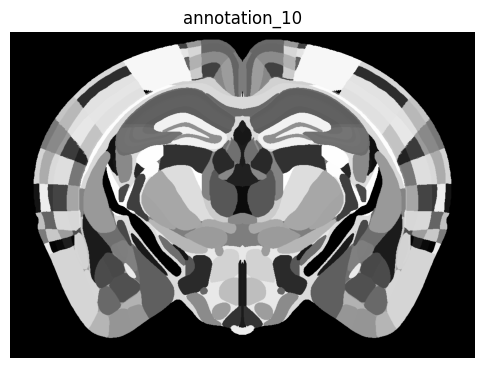

In [25]:
zindex = 720
zslice = np.transpose(annotation_array[:, :, zindex])
fig, ax = plot_section(zslice)
res = ax.set_title('annotation_10')
plt.show()

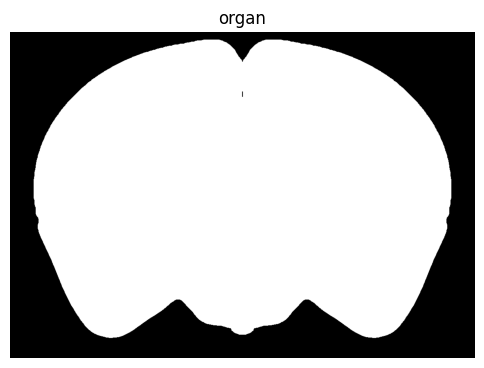

In [26]:
term_set = 'organ'
colorized = colorize(zslice, term_set)
fig, ax = plot_section(colorized)
res = ax.set_title(term_set)
plt.show()

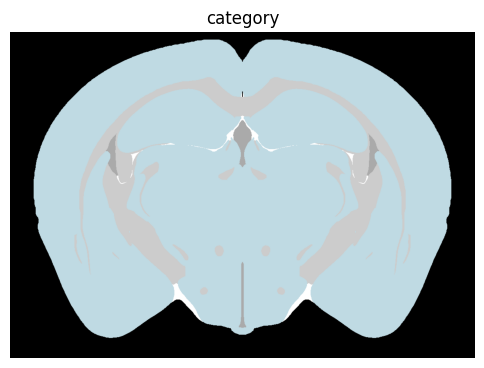

In [27]:
term_set = 'category'
colorized = colorize(zslice, term_set)
fig, ax = plot_section(colorized)
res = ax.set_title(term_set)
plt.show()

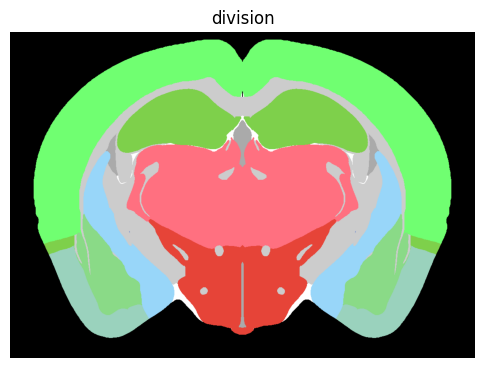

In [28]:
term_set = 'division'
colorized = colorize(zslice, term_set)
fig, ax = plot_section(colorized)
res = ax.set_title(term_set)
plt.show()

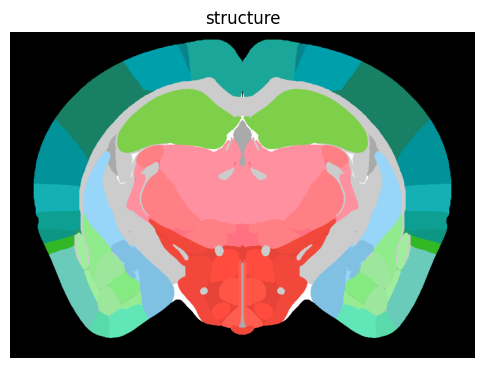

In [29]:
term_set = 'structure'
colorized = colorize(zslice, term_set)
fig, ax = plot_section(colorized)
res = ax.set_title(term_set)
plt.show()

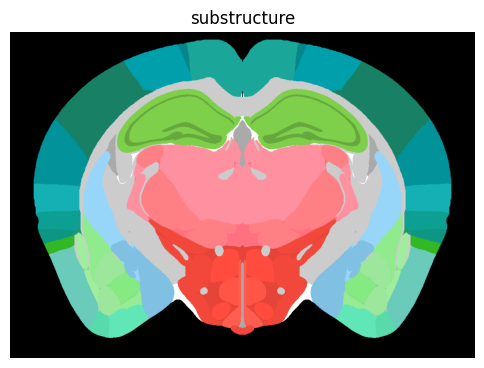

In [30]:
term_set = 'substructure'
colorized = colorize(zslice, term_set)
fig, ax = plot_section(colorized)
res = ax.set_title(term_set)
plt.show()

In [30]:
# --- 위는 일단 동일 코드

In [31]:
term_set = 'division'
colorized = colorize(zslice, term_set)

# 왼쪽 절반만 추출
height, width, _ = colorized.shape
colorized_left = colorized[:, :width // 2, :]

# colorized_left는 RGB 순서라고 가정
# OpenCV용 BGR로 변환
img1_color = colorized_left[:, :, ::-1]

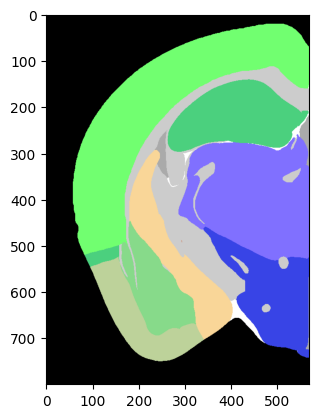

In [32]:
plt.imshow(img1_color)

In [33]:
# --- registration

In [33]:
def convert_to_custom_grayscale(img_bgr):
    """
    img_bgr: (H, W, 3) 형태의 컬러(BGR) 이미지. 
             10가지 고유 색만 포함되어 있다고 가정.
    return : (H, W) 형태의 np.uint8 그레이스케일 이미지
    """
    h, w, _ = img_bgr.shape
    
    # 1) 고유 색상 추출 (배열 형태로)
    unique_colors = np.unique(img_bgr.reshape(-1, 3), axis=0)
    
    # 2) 고유 색상 개수에 맞춰 (0~255) 구간을 균등분할
    num_colors = len(unique_colors)  # 10이라고 가정
    grayscale_levels = np.linspace(0, 255, num_colors).astype(np.uint8)
    
    # 3) 색상 → 그레이스케일 매핑 딕셔너리 구성
    color_to_gray = {}
    for i, color in enumerate(unique_colors):
        # 튜플 형태(key)로 변환
        color_tuple = tuple(color.tolist())
        # 선형 구간 중 i번째 값을 부여
        color_to_gray[color_tuple] = grayscale_levels[i]
    
    # 4) 결과 이미지 초기화 (단일 채널)
    result_gray = np.zeros((h, w), dtype=np.uint8)
    
    # 5) 각 픽셀을 순회하며 매핑 적용
    #    BGR → 튜플 → 매핑 → 그레이스케일
    img_reshaped = img_bgr.reshape(-1, 3)
    for idx, c in enumerate(img_reshaped):
        color_tuple = tuple(c.tolist())
        gray_value = color_to_gray[color_tuple]
        result_gray.flat[idx] = gray_value
    
    return result_gray

In [4]:
from allen_registration import *

/home/jeongbinpark/_allen/allen_registration.py:25: UserWarning: You do not have FURY installed. Some visualization functions might not work for you. Please install or upgrade FURY using pip install -U fury. For detailed installation instructions visit: https://fury.gl/
  from dipy.viz import regtools


In [35]:
#img1folder = './'
img2folder = '../_visium_hd/mouse_brain_data/spatial/'

#img1_color = cv2.imread(img1folder+'output.png')
rotated_img = cv2.rotate(img1_color, cv2.ROTATE_90_COUNTERCLOCKWISE)
img1_color = rotated_img
img2_color = cv2.imread(img2folder+'tissue_hires_image.png')
img2_gray = cv2.cvtColor(img2_color, cv2.COLOR_BGR2GRAY)

img1_gray = convert_to_custom_grayscale(img1_color)

In [36]:
cvt_scale = 6.5

/home/jeongbinpark/_allen/allen_registration.py:63: UserWarning: Pass ['nbins', 'sampling_proportion'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  metric = MutualInformationMetric(nbins, sampling_prop)


COM matching Done


/home/jeongbinpark/_allen/allen_registration.py:87: UserWarning: Pass ['static_grid2world', 'moving_grid2world'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  translation = affreg.optimize(imgref, imgmove, transform, params0,
/home/jeongbinpark/_allen/allen_registration.py:95: UserWarning: Pass ['static_grid2world', 'moving_grid2world'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  rigid = affreg.optimize(imgref, imgmove, transform, params0,


0.5374382493778773
Rigid Transform Done


/home/jeongbinpark/_allen/allen_registration.py:106: UserWarning: Pass ['static_grid2world', 'moving_grid2world'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  affine = affreg.optimize(imgref, imgmove, transform, params0,
/home/jeongbinpark/_allen/allen_registration.py:110: UserWarning: Pass ['title0', 'title_mid', 'title1'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  regtools.overlay_images(imgref, transformed, 'Static', 'Overlay', 'Moving')


0.5931318070009507
Affine Registration Done


/home/jeongbinpark/_allen/allen_registration.py:118: UserWarning: Pass ['sigma_diff', 'radius'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  metric = CCMetric(2, sigma_diff, radius)
/home/jeongbinpark/_allen/allen_registration.py:122: UserWarning: Pass ['level_iters'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  sdr = SymmetricDiffeomorphicRegistration(metric, level_iters, inv_iter=100)
/home/jeongbinpark/_allen/allen_registration.py:136: UserWarning: Pass ['static_grid2world', 'moving_grid2world', 'prealign'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  mapping = sdr.optimize(imgref, imgmove,  identity, identity, affine.affine)
/home/jeongbinpark/_allen/allen_registration.py:139: UserWarning: Pass ['delta'] as keyword args. From version 2.0.0 passing these as positional arguments will result in an error. 
  regtools.

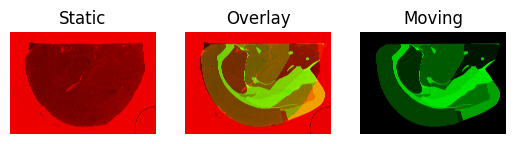

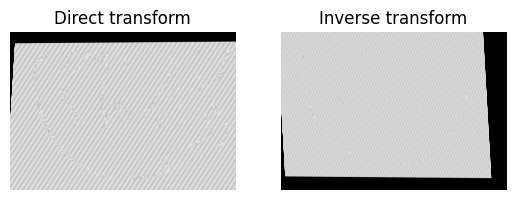

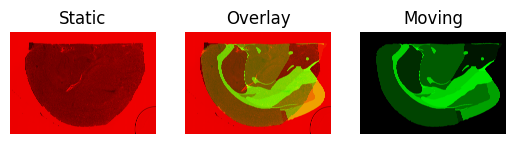

In [37]:
#img1_gray = img1_color[:,:,0]
img1_gray_ = shape_matching(img1_gray, (round(img2_gray.shape[0] // cvt_scale), 
                                        round(img2_gray.shape[1]) // cvt_scale))
img1_gray_ = cv2.resize(img1_gray_, (img2_gray.shape[1],img2_gray.shape[0]))
warped, _ = registration_spatial(img2_gray, img1_gray_)


In [40]:
'''
annot_img = np.stack((warped_B, warped_G, warped_R), axis=-1)
clustered_img = cluster_image_3D(annot_img, 11)
annot_img = clustered_img
plt.imshow(annot_img)
'''

In [38]:
annot_img = warped

In [39]:
clustered_img = cluster_image(annot_img, 11)

In [40]:
annot_img = clustered_img

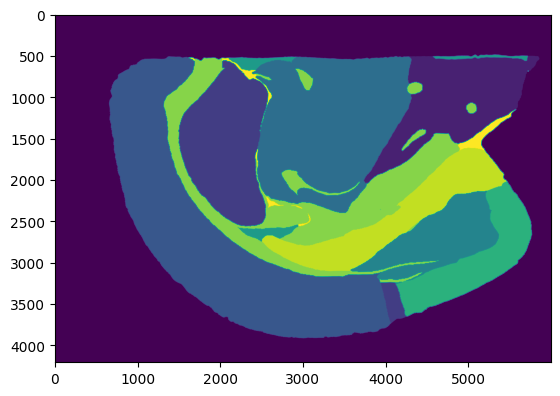

In [41]:
plt.imshow(annot_img)

In [42]:
adata = sc.read_h5ad('../_visium_hd/mouse_brain_data.h5ad')

/home/jeongbinpark/miniconda3/envs/allen/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


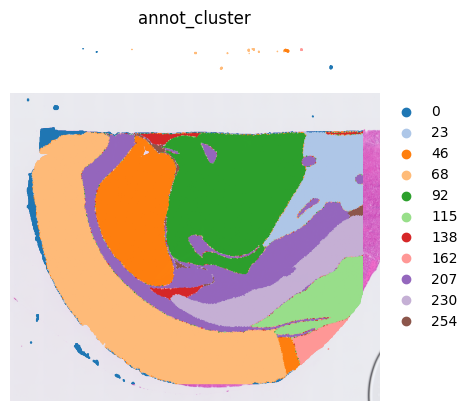

In [43]:
adata = annotate_cells_from_image(adata, annot_img)
adata.obs['annot_cluster'] = adata.obs['annot_cluster'].astype('category')

import seaborn as sns
n_clusters = adata.obs['annot_cluster'].nunique()
palette = sns.color_palette("tab20", n_clusters)  # 20가지 색상 사용 가능
adata.uns['annot_cluster_colors'] = sns.color_palette(palette).as_hex()

sc.pl.spatial(
    adata,
    color='annot_cluster', 
    spot_size=80,      # 필요에 맞게 크기 조절
    frameon=False       # 필요하다면 배경 프레임 끄기 등
)

In [52]:
import numpy as np
from scipy.spatial import cKDTree
from collections import Counter

def reassign_cluster_by_nearest_neighbors(adata, n_neighbors=5, prev_key = 'annot_cluster', new_key='annot_cluster_nn'):
    """
    adata.obs에는 최소한 다음 컬럼이 있다고 가정:
      - 'array_row': 각 셀(또는 스팟)의 y좌표
      - 'array_col': 각 셀(또는 스팟)의 x좌표
      - 'annot_cluster': 기존 할당된 클러스터(총 11종)

    Parameters
    ----------
    adata : AnnData
        좌표 및 클러스터 정보를 담은 AnnData 객체
    n_neighbors : int
        최근접 이웃의 개수 (자기 자신 포함)
    new_key : str
        새로 할당한 클러스터 값을 저장할 obs 컬럼 이름

    Returns
    -------
    None
        함수가 종료되면 adata.obs[new_key] 컬럼에 'annot_cluster'의
        최근접 이웃 다수결 결과가 할당된다.
    """
    # 1) 좌표와 기존 클러스터 추출
    coords = adata.obs[['array_row','array_col']].values
    old_clusters = adata.obs[prev_key].values

    # 2) cKDTree 구축 (최근접 이웃 탐색용)
    tree = cKDTree(coords)

    # 3) 모든 좌표에 대해 k-NN 질의
    #    dist.shape, idx.shape = (N, n_neighbors)
    dist, idx = tree.query(coords, k=n_neighbors)

    # 4) 다수결로 새 클러스터 할당
    new_clusters = np.empty_like(old_clusters)  # dtype 자동 추론 (숫자면 숫자, 문자면 문자)
    for i in range(len(coords)):
        neighbor_labels = old_clusters[idx[i]]
        # 가장 빈도가 높은 클러스터 선택 (Counter 사용)
        label_counts = Counter(neighbor_labels)
        most_common_label = label_counts.most_common(1)[0][0]
        new_clusters[i] = most_common_label

    # 5) adata.obs에 새 클러스터 열 저장
    adata.obs[new_key] = new_clusters

In [ ]:
reassign_cluster_by_nearest_neighbors(adata, n_neighbors=25) # Run this multiple times if needed

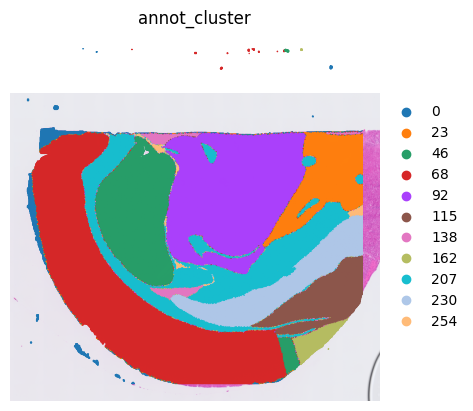

In [54]:
sc.pl.spatial(
    adata,
    color='annot_cluster', 
    spot_size=80,      # 필요에 맞게 크기 조절
    frameon=False       # 필요하다면 배경 프레임 끄기 등
)

In [2]:
import scanpy as sc
adata = sc.read_h5ad('250319_annotation_visiumhd.h5ad')

/home/jeongbinpark/miniconda3/envs/allen/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
'''
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN

def clean_clusters_with_dbscan(adata, eps=5, min_samples=5, cluster_key='annot_cluster', new_key='cleaned_cluster'):
    """
    Apply DBSCAN to each cluster in adata.obs[cluster_key] to remove outliers.
    
    Parameters
    ----------
    adata : AnnData
        AnnData object containing spatial coordinates and cluster information.
    eps : float
        The maximum distance between two samples for them to be considered as in the same neighborhood.
    min_samples : int
        The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
    cluster_key : str
        Column name in adata.obs containing the cluster labels.
    new_key : str
        Column name in adata.obs to store the cleaned cluster labels.
    
    Returns
    -------
    None
        adata.obs[new_key] will be updated with cleaned cluster labels (outliers set to NaN).
    """
    # Copy original cluster information
    adata.obs[new_key] = adata.obs[cluster_key]

    # Apply DBSCAN for each cluster
    unique_clusters = adata.obs[cluster_key].unique()
    
    for cluster in unique_clusters:
        # Filter cells (coordinates) belonging to the corresponding cluster
        cluster_mask = adata.obs[cluster_key] == cluster
        cluster_coords = adata.obs.loc[cluster_mask, ['array_row', 'array_col']].values
        
        if len(cluster_coords) < min_samples:
            # Ignore clusters that are too small
            continue
        
        # Apply DBSCAN
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(cluster_coords)
        
        # Noise points are labeled as -1
        labels = db.labels_
        
        # If a point is a noise point, set the cluster value to NaN
        noise_mask = (labels == -1)
        adata.obs.loc[cluster_mask, new_key] = np.where(noise_mask, np.nan, cluster)

'''

In [5]:
clean_clusters_with_dbscan(adata)

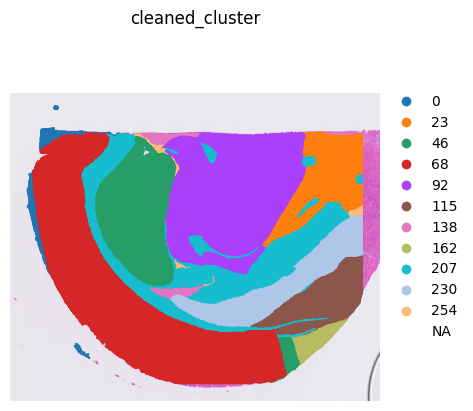

In [6]:
sc.pl.spatial(
    adata,
    color='cleaned_cluster', 
    spot_size=80,      # 필요에 맞게 크기 조절
    frameon=False       # 필요하다면 배경 프레임 끄기 등
)

In [7]:
adata.write_h5ad('250319_annotation_visiumhd.h5ad')